<a href="https://colab.research.google.com/github/Sagargomad/My_project1/blob/main/cifar_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

[7]


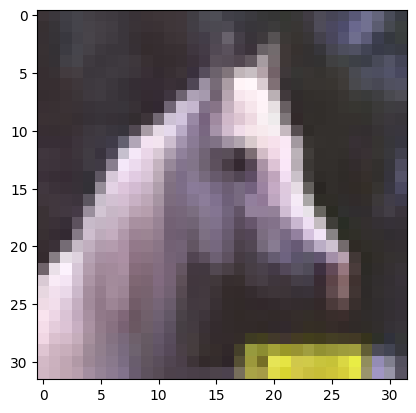

In [7]:
i=28969
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


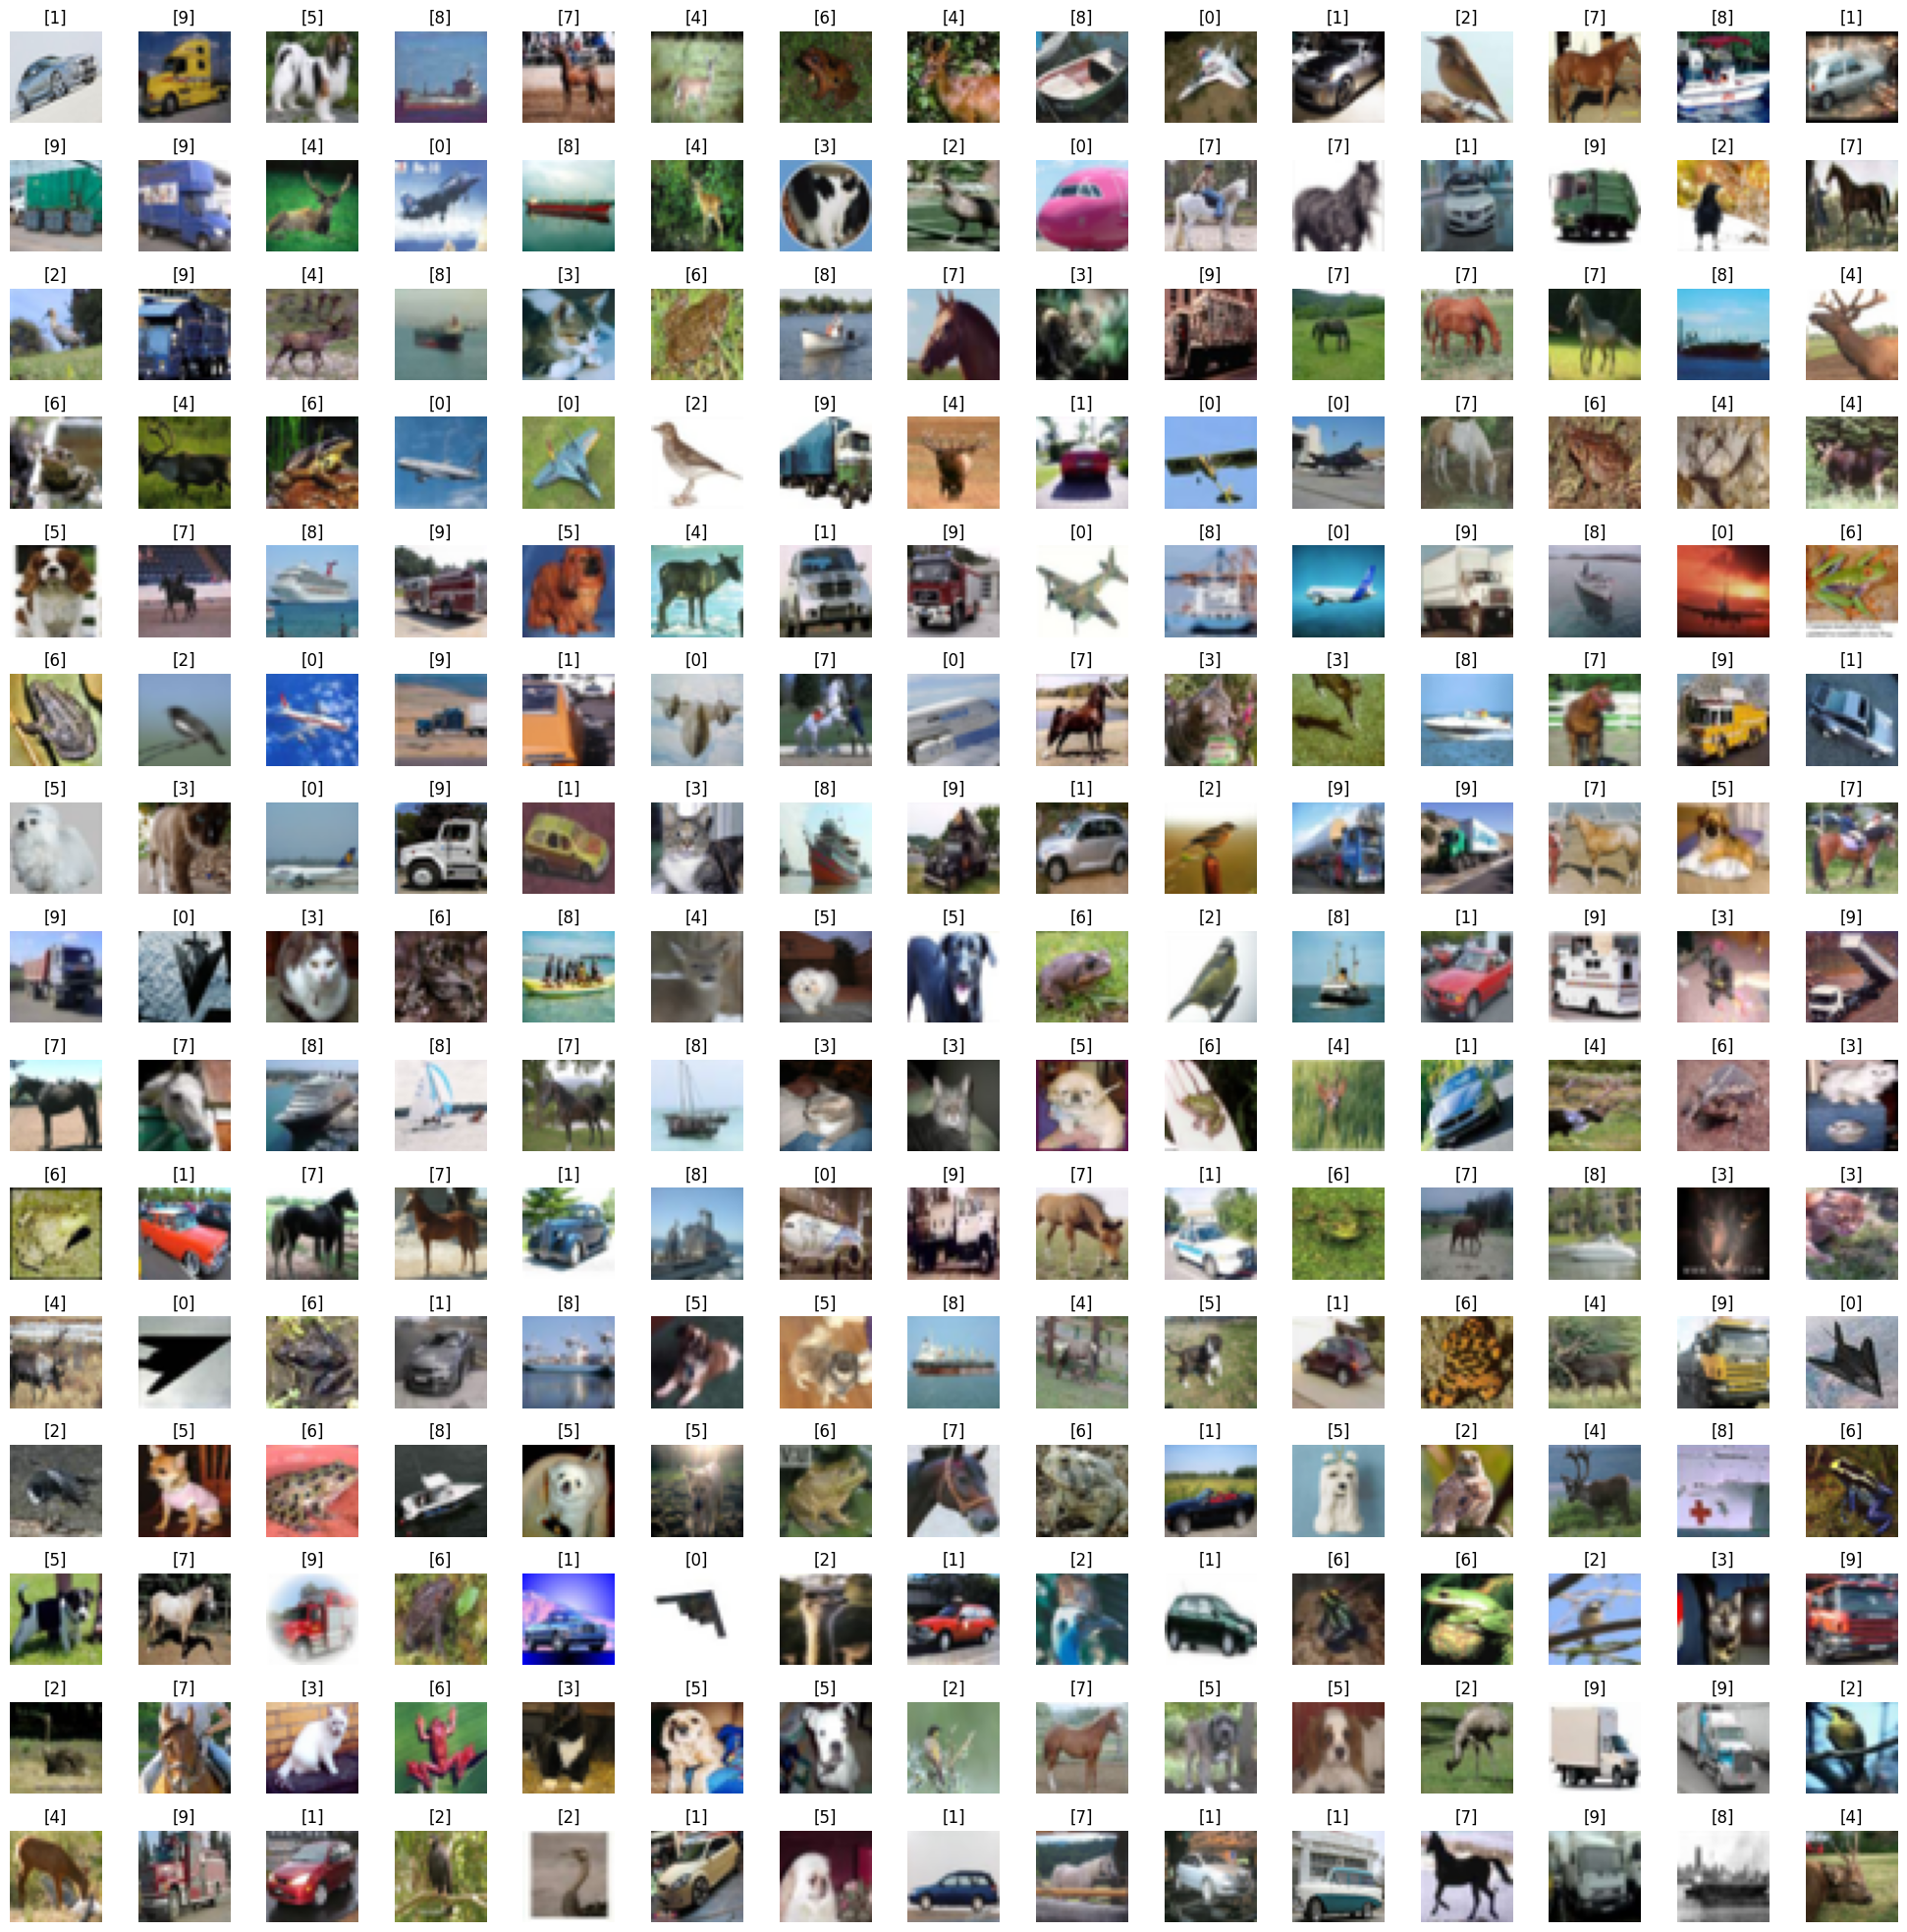

In [8]:
w_grid=15
l_grid=15
fig,axes=plt.subplots(l_grid,w_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train)
for i in np.arange(0,l_grid*w_grid):
  index=np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis("off")
plt.subplots_adjust(hspace=0.4)



In [9]:
X_train=X_train.astype("float32")
X_test=X_test.astype("float32")

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
number_cat=10

In [12]:
import keras
y_train=keras.utils.to_categorical(y_train,number_cat)
y_test=keras.utils.to_categorical(y_test,number_cat)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [16]:
X_train=X_train/255
X_test=X_test/255

In [17]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [18]:
input_shape=X_train.shape[1:]

In [19]:
input_shape

(32, 32, 3)

In [26]:
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Flatten,Dense,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [23]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=input_shape))
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Dropout(0.3))
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=512,activation="relu"))
cnn_model.add(Dense(units=512,activation="relu"))
cnn_model.add(Dense(units=10,activation="softmax"))

In [30]:
cnn_model.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.RMSprop(lr=0.001),metrics=["accuracy"])

In [31]:
history=cnn_model.fit(X_train,y_train,batch_size=32,shuffle=True,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 392s 250ms/step - loss: 1.3925 - accuracy: 0.5030
Epoch 2/5
1563/1563 [==============================] - 434s 278ms/step - loss: 0.9393 - accuracy: 0.6773
Epoch 3/5
1563/1563 [==============================] - 469s 300ms/step - loss: 0.7422 - accuracy: 0.7481
Epoch 4/5
1563/1563 [==============================] - 503s 322ms/step - loss: 0.6092 - accuracy: 0.7971
Epoch 5/5
1563/1563 [==============================] - 392s 251ms/step - loss: 0.5088 - accuracy: 0.8330


In [32]:
evaluation=cnn_model.evaluate(X_test,y_test)
print("Test Accuracy : {}.fromat(evaluation[1])")

313/313 [==============================] - 19s 61ms/step - loss: 1.0561 - accuracy: 0.6861
Test Accuracy : {}.fromat(evaluation[1])


In [41]:
predicted_classes=cnn_model.predict(X_test)
predicted_classes=predicted_classes.argmax(1)

313/313 [==============================] - 17s 55ms/step


In [42]:
predicted_classes

array([3, 8, 0, ..., 5, 4, 7])

In [35]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [36]:
y_test=y_test.argmax(1)

In [37]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

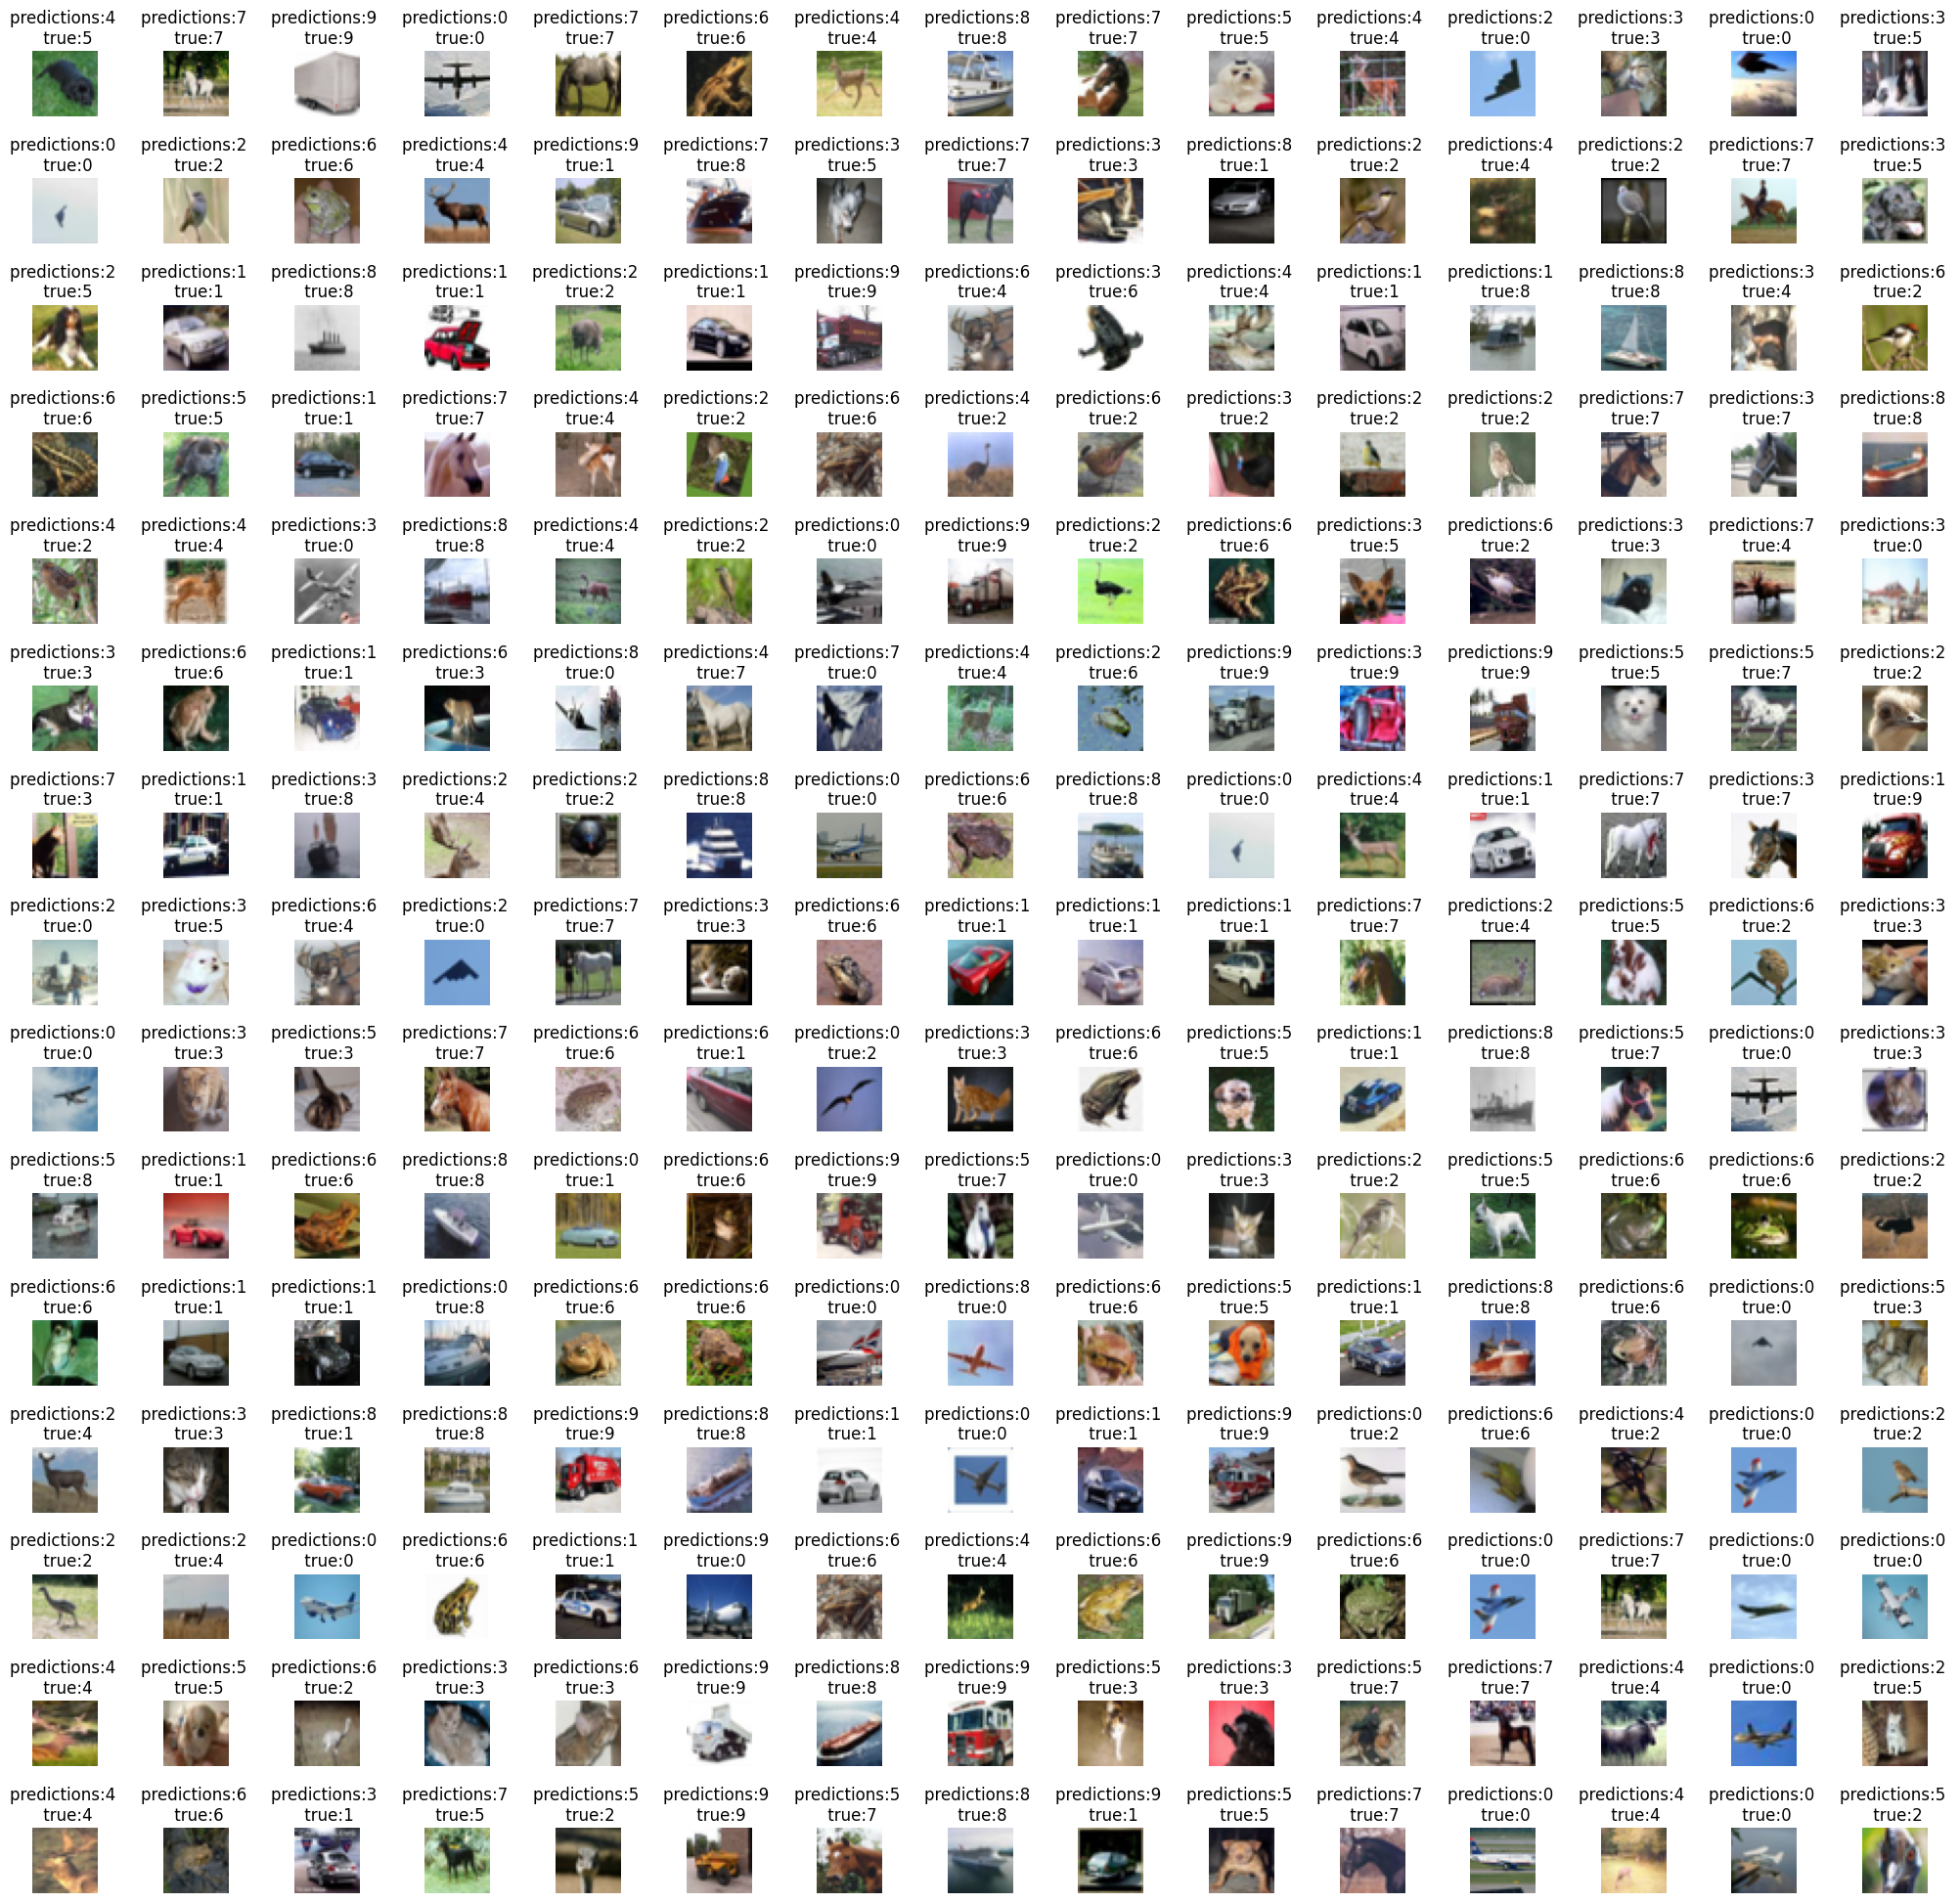

In [51]:
w_grid=15
l_grid=15
fig,axes=plt.subplots(l_grid,w_grid,figsize=(25,25))
axes=axes.ravel()
n_test=len(X_test)
for i in np.arange(0,l_grid*w_grid):
  index=np.random.randint(0,n_test)
  axes[i].imshow(X_test[index])
  axes[i].set_title("predictions:{} \n true:{}".format(predicted_classes[index],y_test[index]))
  axes[i].axis("off")
plt.subplots_adjust(wspace=1)

<Axes: >

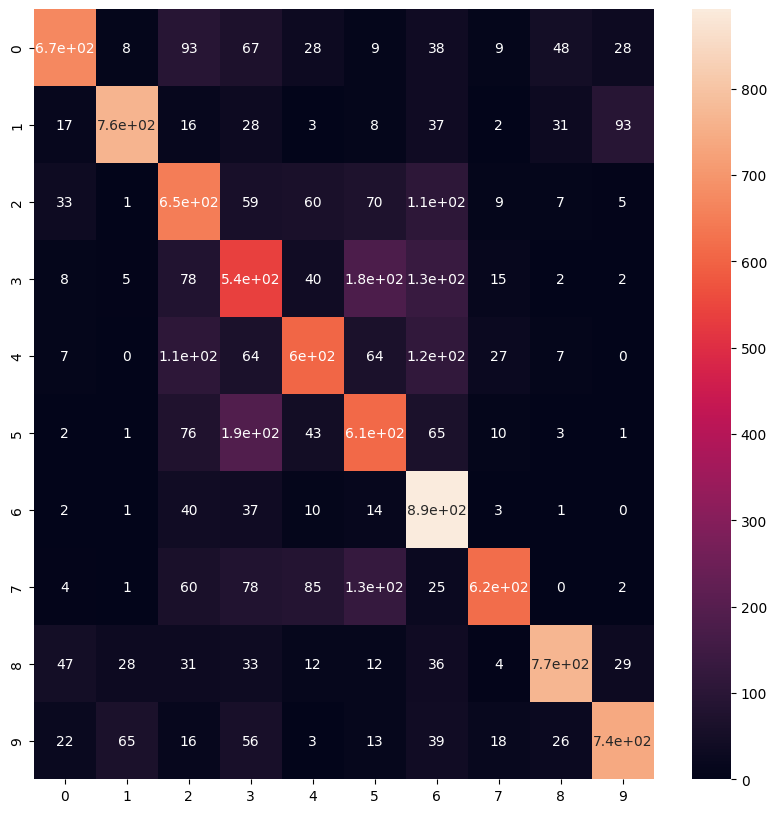

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,predicted_classes)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [52]:
import os
directory=os.path.join(os.getcwd(),"saved_models")
if not os.path.isdir(directory):
  os.makedirs(directory)
model_path=os.path.join(directory,"cifar10_trained_model.h5")
cnn_model.save(model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
